In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("ablone.csv")

In [5]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# target variable is Rings

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

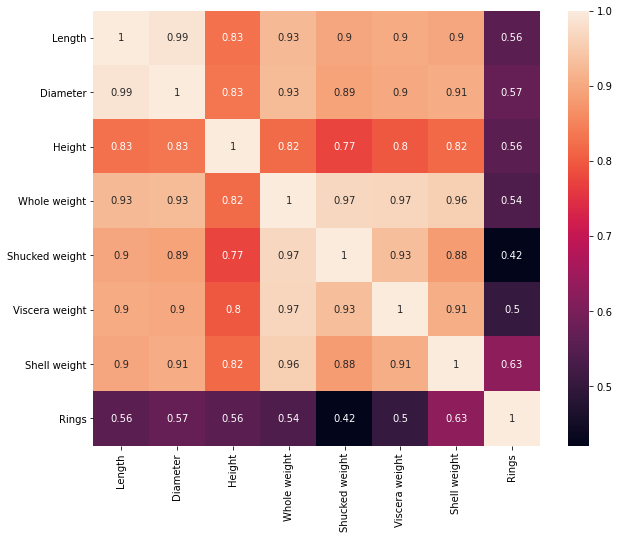

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

In [20]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [21]:
data.shape

(4177, 9)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<AxesSubplot:xlabel='Rings'>

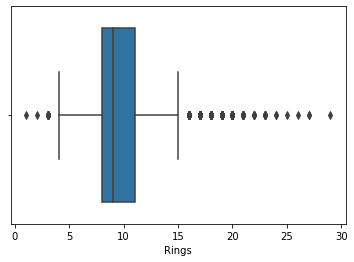

In [23]:
sns.boxplot(data['Rings'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

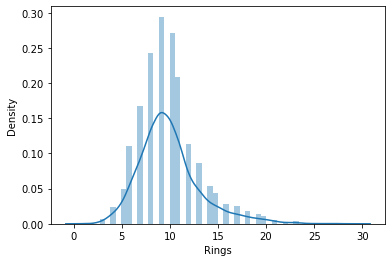

In [24]:
sns.distplot(data['Rings'])

outlier present in Ring columns so remove outlier 

<AxesSubplot:xlabel='Rings', ylabel='Density'>

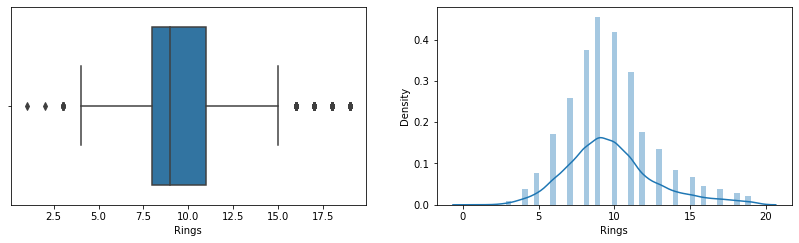

In [34]:
data = data[data['Rings'] < 20]
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.boxplot(data['Rings'])
plt.subplot(2,2,2)
sns.distplot(data['Rings'])

<AxesSubplot:>

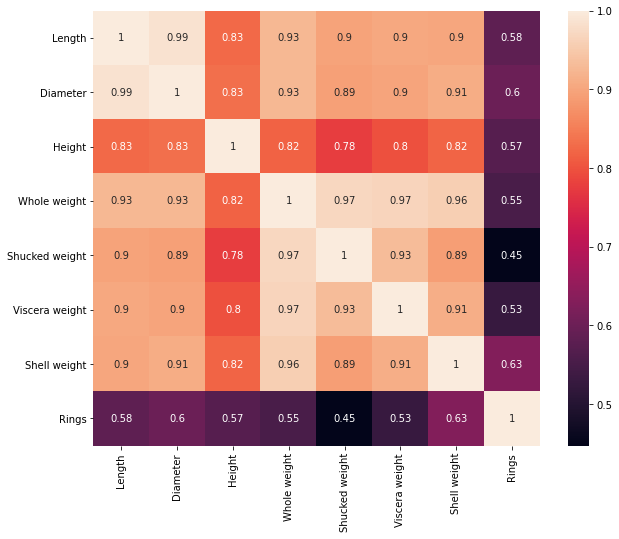

In [35]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

# removing outlier lenngth and shell weight highly correlated to each other

<AxesSubplot:>

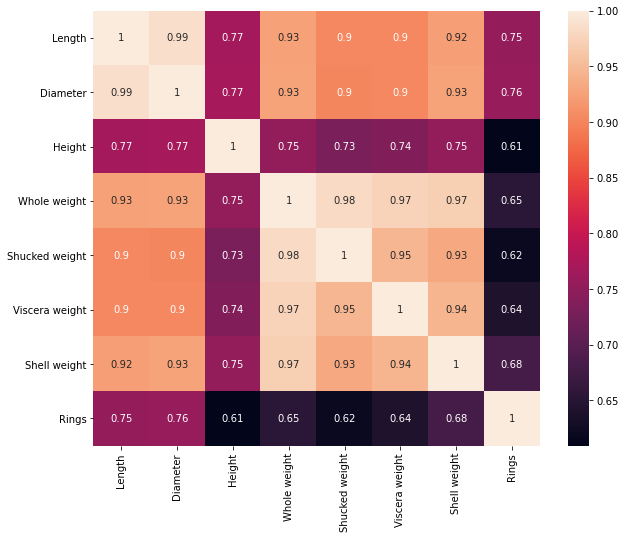

In [41]:
#again check the ring <10



abalone = data[data['Rings'] < 10]

plt.figure(figsize=(10, 8))
corr = abalone.corr()
sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

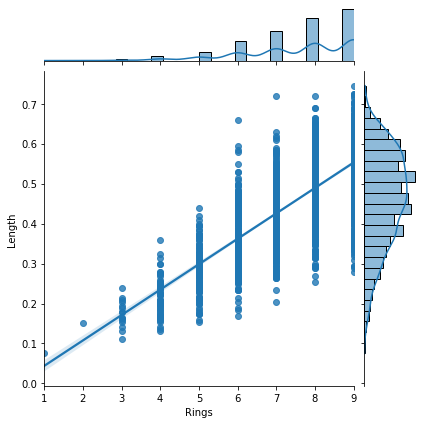

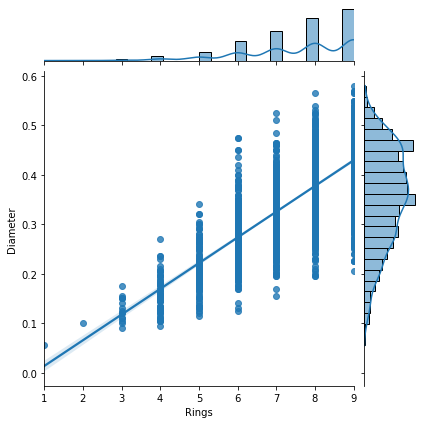

In [42]:
plt.figure(figsize=(20, 5))

sns.jointplot(data=abalone, x='Rings', y='Length', kind='reg')
sns.jointplot(data=abalone, x='Rings', y='Diameter', kind='reg')
#sns.jointplot(data=abalone, x='Rings', y='Height', kind='reg')

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

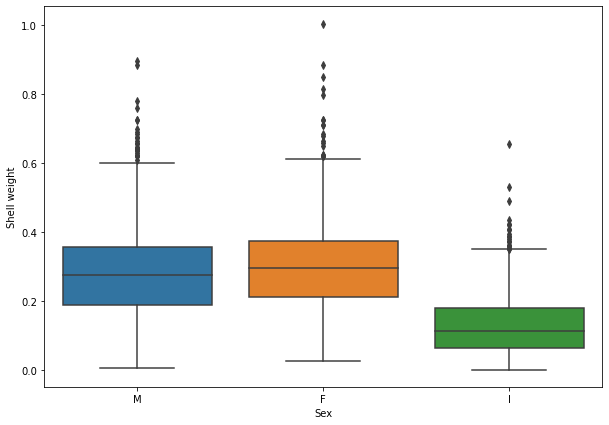

In [26]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Sex', y='Shell weight')

<AxesSubplot:xlabel='Sex', ylabel='count'>

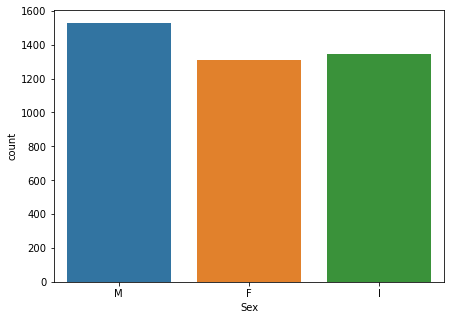

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(data.Sex)

sex is catogarical atributes male female infrant

<AxesSubplot:xlabel='Sex', ylabel='Height'>

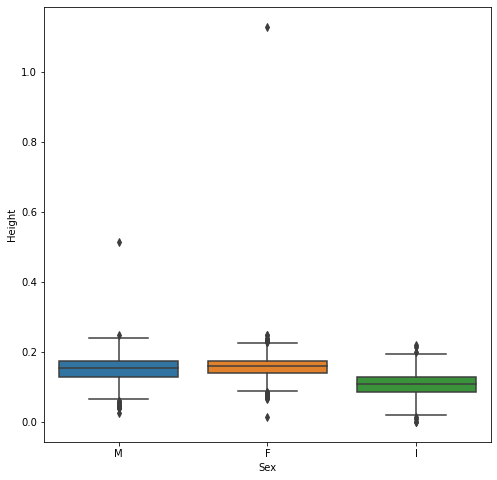

In [52]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x='Sex', y='Height')

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

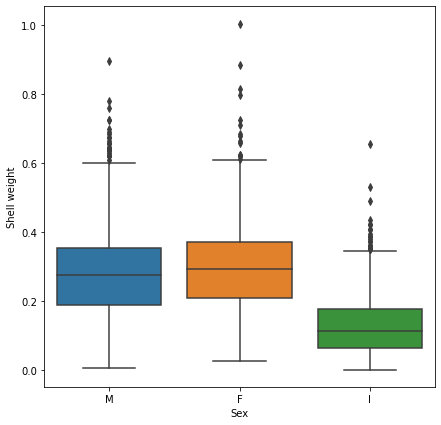

In [54]:
#for shell weight
plt.figure(figsize=(7, 7))
sns.boxplot(data=data, x='Sex', y='Shell weight')

# convert the data in numeriacl

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex']= le.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


remove outlier

In [56]:
from scipy import stats
data_outlier= data.copy()
z = np.abs(stats.zscore(data_outlier))
print(z)

[[1.15323121 0.56320608 0.42051225 ... 0.7175446  0.62742779 1.80487537]
 [1.15323121 1.43656107 1.42802777 ... 1.19725737 1.21199253 0.95009738]
 [1.28726579 0.06061891 0.13362129 ... 0.34748047 0.18900424 0.26135419]
 ...
 [1.15323121 0.64285557 0.68775482 ... 0.98657789 0.52708757 0.26135419]
 [1.28726579 0.85079724 0.78850637 ... 0.74443716 0.43940286 0.0830174 ]
 [1.15323121 1.55779889 1.49376723 ... 1.79980525 1.89350765 0.77176059]]


In [57]:
threshold = 3
print(np.where(z > 3))

(array([   8,   32,   79,  125,  126,  160,  161,  162,  162,  162,  163,
        165,  229,  229,  229,  229,  230,  230,  231,  231,  232,  249,
        268,  283,  300,  320,  342,  342,  348,  355,  407,  419,  457,
        471,  499,  553,  564,  612,  634,  642,  662,  662,  685,  685,
        686,  853,  853,  853, 1010, 1013, 1013, 1014, 1014, 1155, 1159,
       1161, 1164, 1166, 1168, 1168, 1169, 1169, 1169, 1169, 1171, 1171,
       1219, 1379, 1379, 1380, 1384, 1388, 1389, 1389, 1389, 1390, 1391,
       1391, 1490, 1716, 1718, 1719, 1721, 1723, 1724, 1724, 1724, 1725,
       1725, 1725, 1783, 1944, 1948, 1949, 2013, 2052, 2063, 2075, 2075,
       2118, 2121, 2122, 2159, 2165, 2230, 2232, 2302, 2316, 2318, 2331,
       2446, 2491, 2570, 2571, 2571, 2571, 2572, 2656, 2657, 2657, 2757,
       2757, 2758, 2758, 2758, 2809, 2810, 2810, 2810, 2954, 2955, 3094,
       3132, 3187, 3261, 3301, 3314, 3322, 3333, 3368, 3368, 3368, 3540,
       3540, 3569, 3654, 3656, 3656, 3656, 3656, 3

In [58]:
data_outlier= data_outlier[(z < 3).all(axis=1)]
data.shape

(4115, 9)

In [59]:
data_outlier.shape

(3995, 9)

separat input and out put

In [69]:
x = data_outlier.drop('Rings', axis = 1) # Input/independent variable
y = data_outlier. Rings # Target / dependent variable

In [70]:
# import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
max_accu=0
maxrs=0
for a in range(1,5000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = a)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>max_accu:
        max_accu=acc
        maxrs=a
print("best accuracy is",maxaccur,"on random_state",maxrs)
    

In [ ]:

max_accu=0
maxrs=0
for a in range(1,5000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = a)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>max_accu:
        max_accu=acc
        maxrs=a
print("best accuracy is",maxaccur,"on random_state",maxrs)
    